<a href="https://colab.research.google.com/github/sam505/Machine_Learning/blob/master/Pytorch_Tutoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###In this notebook, we will introduce PyTorch, talk about its important concepts and features, and eventually train an MNIST classifier using what we have learned. Finally, you will perform a simple image classification task with a CNN. 

## Check running in GPU session:
Runtime -> Change runtime type -> Hardware accelerator -> GPU

## What is PyTorch?

1. A Python GPU-accelerated tensor library (NumPy, but faster)
2. Differentiable Programming with dynamic computation graphs
3. Flexible and efficient **neural network** library
4. Python-first framework (easy to integrate with other Python libraries, debug, and extend)
  + Quick conversion from & to NumPy array, integration with other Python libs.
  + Your favorite Python debugger.
  + Adding custom ops with Python/c++ extension. 
  + Running in purely c++ environment with the c++ API.

Useful links:

+ PyTorch documentation: https://pytorch.org/docs/stable/index.html

  Most math operations can be found as `torch.*` or `Tensor.*`.
+ PyTorch official tutorials (60-min blitz is a good start): https://pytorch.org/tutorials/
    - Transfer learning tutorial: https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html
+ PyTorch examples (DCGAN, ImageNet training, Reinforcement Learning, etc.): https://github.com/pytorch/examples/

## GPU-accelerated Tensor Library

Tensors are a specialized data structure that are very similar to arrays and matrices. In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model’s parameters.

Tensors are similar to NumPy’s ndarrays, except that tensors can run on GPUs or other specialized hardware to accelerate computing.

In [ ]:
import torch
import numpy as np

**Tensor Initialization**

in PyTorch, tensor is the basic element. torch.tensor is like numpy array but can run on a GPU

Tensors can be initialized in various ways. Take a look at the following examples:

**Directly from data**

Tensors can be created directly from data. The data type is automatically inferred.

In [ ]:
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)
print(x_data)

tensor([[1, 2],
        [3, 4]])


**From a NumPy array**

Tensors can be created from NumPy arrays.

In [ ]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
print(x_np)

tensor([[1, 2],
        [3, 4]])


In [ ]:
# You can convert an existhing array to a tensor

a_tensor = torch.as_tensor(np_array)
print(a_tensor)

tensor([[1, 2],
        [3, 4]])


**From another tensor:**

The new tensor retains the properties (shape, datatype) of the argument tensor, unless explicitly overridden.


In [ ]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.1519, 0.1548],
        [0.2870, 0.1568]]) 



**With random or constant values:**

``shape`` is a tuple of tensor dimensions. In the functions below, it determines the dimensionality of the output tensor.

In [ ]:
shape = (2, 3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.1303, 0.4407, 0.7419],
        [0.2800, 0.9143, 0.0387]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


Tensor Attributes
~~~~~~~~~~~~~~~~~
Tensor attributes describe their shape, datatype, and the device on which they are stored.



In [ ]:
tensor = torch.rand(3, 4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


**Tensor Operations**

Over 100 tensor operations, including transposing, indexing, slicing,
mathematical operations, linear algebra, random sampling, and more are
comprehensively described
here <https://pytorch.org/docs/stable/torch.html>.

Each of them can be run on the GPU (at typically higher speeds than on a
CPU). If you’re using Colab, allocate a GPU by going to Edit > Notebook
Settings and choose GPU.

In [ ]:

# We move our tensor to the GPU if available
if torch.cuda.is_available():
  tensor = tensor.to('cuda')
  print(f"Device tensor is stored on: {tensor.device}")

Device tensor is stored on: cuda:0


Try out some of the operations from the list.
If you're familiar with the NumPy API, you'll find the Tensor API a breeze to use.

**Standard numpy-like indexing and slicing:**

In [ ]:
tensor = torch.ones(4, 4)
tensor[:,1] = 0 # set second column to 0. 
print(tensor)
tensor2 = torch.arange(1,5,0.5)
print(tensor2) 
print(tensor2[1])

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])
tensor([1.0000, 1.5000, 2.0000, 2.5000, 3.0000, 3.5000, 4.0000, 4.5000])
tensor(1.5000)


**Shape manipulations**

In [ ]:
## Transpose 
print('\n.t()  (transpose): ')
print(rand_tensor.t())

## Reshape tensor to (3,2)
print('.reshape(3, 2): ')
print(rand_tensor.reshape(3, 2))



.t()  (transpose): 
tensor([[0.1303, 0.2800],
        [0.4407, 0.9143],
        [0.7419, 0.0387]])
.reshape(3, 2): 
tensor([[0.1303, 0.4407],
        [0.7419, 0.2800],
        [0.9143, 0.0387]])


**Joining tensors** 

You can use ``torch.cat`` to concatenate a sequence of tensors along a given dimension.
See also `torch.stack <https://pytorch.org/docs/stable/generated/torch.stack.html>`__,
another tensor joining op that is subtly different from ``torch.cat``.

In [ ]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


**Multiplying tensors**

In [ ]:
# This computes the element-wise product
print(f"tensor.mul(tensor) \n {tensor.mul(tensor)} \n")
# Alternative syntax:
print(f"tensor * tensor \n {tensor * tensor}")

tensor.mul(tensor) 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor * tensor 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


This computes the matrix multiplication between two tensors.

In [ ]:
print(f"tensor.matmul(tensor.T) \n {tensor.matmul(tensor.T)} \n")
# Alternative syntax:
print(f"tensor @ tensor.T \n {tensor @ tensor.T}")

tensor.matmul(tensor.T) 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]]) 

tensor @ tensor.T 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])


**In-place operations**

Operations that have a ``_`` suffix are in-place. For example: ``x.copy_(y)``, ``x.t_()``, will change ``x``.


In [ ]:
print(tensor, "\n")
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


#### GPU Acceleration

Everything can be run on a GPU. If you already turn on GPU in runtime, you will see your tensors have device='cuda:0'. Here we get into more details.

First, let us create a [`torch.device`](https://pytorch.org/docs/stable/tensor_attributes.html#torch-device) object representing a GPU device.

**Making sure you enabled GPU**:

Runtime -> Change runtime type -> Hardware accelerator -> GPU

In [ ]:
cuda0 = torch.device('cuda:0')  # pick the GPU at index 0

In [ ]:
y = torch.rand(3, 5)
y

tensor([[0.8068, 0.9918, 0.3876, 0.3908, 0.6475],
        [0.7211, 0.6727, 0.5535, 0.1432, 0.3275],
        [0.6262, 0.2501, 0.9415, 0.2382, 0.0039]])

In [ ]:
# Move a tensor from CPU to GPU
# NOTE: the first time you access a GPU, a context is created so this may take a
# few seconds. But subsequent uses will be fast.

cuda_y = y.to(cuda0)
print(cuda_y)

tensor([[0.8068, 0.9918, 0.3876, 0.3908, 0.6475],
        [0.7211, 0.6727, 0.5535, 0.1432, 0.3275],
        [0.6262, 0.2501, 0.9415, 0.2382, 0.0039]], device='cuda:0')


In [ ]:
# Or directly creating a tensor on GPU
x = torch.zeros(3, 5)
cuda_x = torch.zeros(3, 5, device=cuda0)
print("create tensor x on CPU:",x)
print("create tensor x on GPU:",cuda_x)

create tensor x on CPU: tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
create tensor x on GPU: tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]], device='cuda:0')


In [ ]:
# All functions and methods work on GPU tensors

print("Computing on GPU:", (cuda_y * (cuda_x + 2)).exp()) 

 # The compuated value matches the CPU results above
print("Computing on CPU:", (y * (x + 2)).exp()) 
 

Computing on GPU: tensor([[5.0209, 7.2685, 2.1708, 2.1850, 3.6513],
        [4.2299, 3.8395, 3.0252, 1.3316, 1.9252],
        [3.4984, 1.6490, 6.5735, 1.6104, 1.0078]], device='cuda:0')
Computing on CPU: tensor([[5.0209, 7.2685, 2.1708, 2.1850, 3.6513],
        [4.2299, 3.8395, 3.0252, 1.3316, 1.9252],
        [3.4984, 1.6490, 6.5735, 1.6104, 1.0078]])


# Exercise 0: A simple neural network forward model (one layer). 

---



In [ ]:
def activation(x):
    """ Sigmoid activation function 
    
        Arguments
        ---------
        x: torch.Tensor
    """
    return 1/(1+torch.exp(-x))

In [ ]:
### Generate some data
torch.manual_seed(7) # Set the random seed so things are predictable
# Features are 5 random normal variables
features = torch.randn((1, 5))
# True weights for our data, random normal variables again
weights = torch.randn_like(features)
# and a true bias term
bias = torch.randn((1, 1))

features = torch.randn((1, 5)) creates a tensor with shape (1, 5), one row and five columns, that contains values randomly distributed according to the normal distribution with a mean of zero and standard deviation of one.

weights = torch.randn_like(features) creates another tensor with the same shape as features, again containing values from a normal distribution.

Finally, bias = torch.randn((1, 1)) creates a single value from a normal distribution.
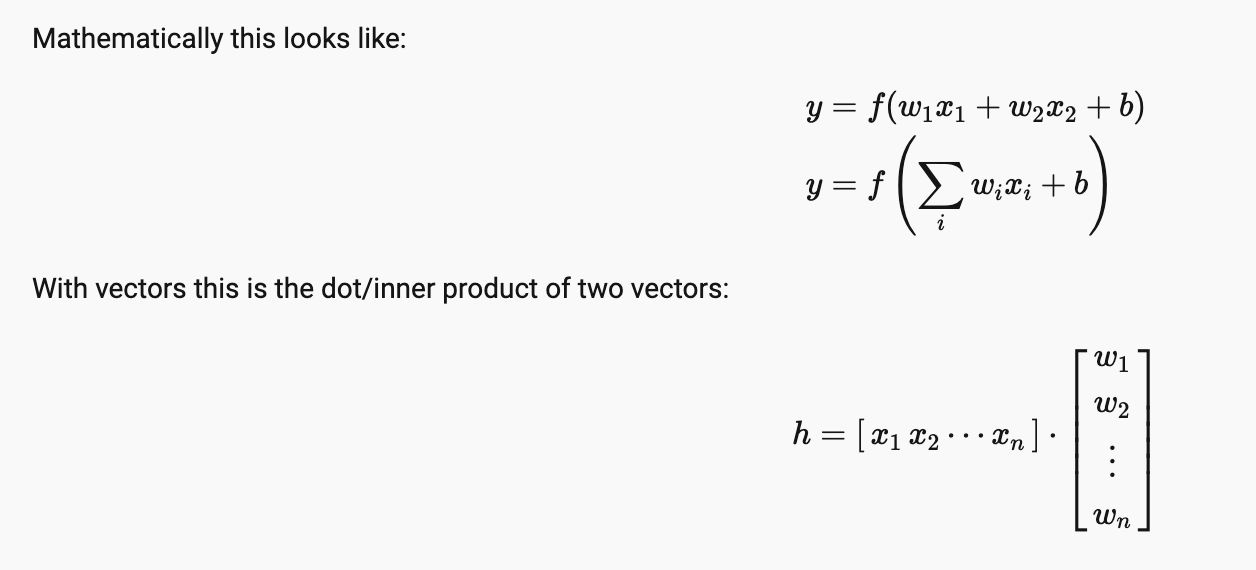

Solution

In [ ]:
## TODO: Calculate the output of our little network using matrix multiplication. 
## Compute the element by element multiplication of features and weights and sum them up, and then add the bias function (see above equation and also
##linear classifer lecture last week)). Outout the result. Then pass the result in the above defined acivation function and to output the neuron's output. 
## hint: you can try torch.sum() or you can use torch.mm(features, weights) to perform matrix multiplication that includes sum and multiplicaiton. but might need to reshape the tensors.

## Differentiable Programming with Dynamic Computation Graphs

Gradient-based optimization is an essential part of the modern deep learning frenzy. PyTorch uses [reverse-mode automatic differentiation](https://en.wikipedia.org/wiki/Automatic_differentiation) to efficiently compute gradients through any computations done on tensors.

### Dynamic vs. Static

A neural network is essentially a sequence of mathematical operations on tensors, which build up a computation graph.

Most frameworks such as TensorFlow, Theano, Caffe and CNTK have a static view of the world. One has to build a neural network, and reuse the same structure again and again. Changing the way the network behaves means that one has to start from scratch.

PyTorch uses a technique called reverse-mode auto-differentiation, which allows you to change the way your network behaves arbitrarily with zero lag or overhead. 


### Dynamic computation graphs

When you create a tensor with its `requires_grad` flag set to `True`, the [`autograd`](https://pytorch.org/docs/stable/autograd.html) engine considers it as a **leaf** node of the computation graph. As you compute with it, the graph is dynamically expanded. When you ask for gradients (e.g., via `tensor.backward()`), the `autograd` engine traces backwards through the graph, and automatically computes the gradients for you.

![alt text](https://github.com/pytorch/pytorch/raw/master/docs/source/_static/img/dynamic_graph.gif)


**Let's see this in action!**

In [ ]:
# Now, we want tensors with `requires_grad=True`

a = torch.ones(3, 5, requires_grad=True)  # tensor of all ones
print(a)  # notice that the `requires_grad` flag is on!

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]], requires_grad=True)


In [ ]:
# Currently `a` has no gradients

print(a.grad)

None


In [ ]:
# Let's compute the gradient wrt the sum

s = a.sum()
print('sum of a is', s)

sum of a is tensor(15., grad_fn=<SumBackward0>)


In [ ]:
# Notice the `grad_fn` of `s`. it represents the function used to propagate 
# gradients from `s` to previous nodes of the graph (`a` in this case).

s.backward()  # compute gradient!
print(a.grad) # Yay! Indeed d \sum_a / d a_ij = 1

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])


In [ ]:
# Gradients are automatically **accumulated**

a.sum().backward()
print(a.grad)  # now the new gradients are added to the old ones


tensor([[2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.]])


In [ ]:
# Don't worry, we have easy ways to clear the gradients too. 
# We can zero the gradient in this way:
a.grad.zero_()

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [ ]:
# Now let's do something slightly fancier, on GPU!

a = torch.ones(3, 4, device=cuda0, requires_grad=True)
b = torch.randn(4, 4, device=cuda0, requires_grad=True)

result = (torch.mm(a, b.t().exp()) * 0.5).sum() * b.prod() - b.mean()
print('this complicated chain of operation gives....')
print(result)

this complicated chain of operation gives....
tensor(-0.8192, device='cuda:0', grad_fn=<SubBackward0>)


In [ ]:
result.backward()
print('\ngradient wrt a is')
print(a.grad)
print('\ngradient wrt b is')
print(b.grad)


gradient wrt a is
tensor([[-0.1572, -0.0343, -0.0147, -0.0552],
        [-0.1572, -0.0343, -0.0147, -0.0552],
        [-0.1572, -0.0343, -0.0147, -0.0552]], device='cuda:0')

gradient wrt b is
tensor([[-0.6743, -0.7844,  1.2299,  7.6194],
        [-0.6839,  0.2199,  0.7135, -1.3231],
        [ 1.8705,  0.6984, 11.3607,  0.3801],
        [-1.2473, -1.6471,  0.9129, -0.6229]], device='cuda:0')


**Manipulating the `requires_grad` flag**

In [ ]:
# Other than directly setting it at creation time, you can change this flag 
# in-place using `my_tensor.requires_grad_()`, or, as in the above example, or
# just directly setting the attribute.

x = torch.randn(1, 4, 5)
print(x)
print('x does not track gradients')

tensor([[[-0.7965,  1.4900, -0.5249,  0.8828, -0.3084],
         [-0.4312,  2.1007, -1.6831,  0.3513,  0.1554],
         [-1.0476, -0.3570,  0.3230, -1.1371,  1.1909],
         [-0.7549, -0.5165,  0.1856,  2.5100, -1.1526]]])
x does not track gradients


In [ ]:
x.requires_grad_()
print(x)
print('x now **does** track gradients')

tensor([[[-0.7965,  1.4900, -0.5249,  0.8828, -0.3084],
         [-0.4312,  2.1007, -1.6831,  0.3513,  0.1554],
         [-1.0476, -0.3570,  0.3230, -1.1371,  1.1909],
         [-0.7549, -0.5165,  0.1856,  2.5100, -1.1526]]], requires_grad=True)
x now **does** track gradients


# Exercise 1

$z = \sqrt{\frac{1}{\sum_i \exp(a_i)} \sum_j b_j} - \sum_k b_k$.

Please first create tensors $a$ and $b$, where $a$ is a random tensor of shape (5,4), filled with random numbers from a uniform distribution on the interval [0, 1), and $b$ has the same shape as $a$ with elements filled with 1. Please write a function to compute the gradients of 𝑧  w.r.t.  𝐚  and  𝐛. Make sure you set a seed for reproduction.


## Flexible and Efficient Neural Network Library

The [`torch.nn`](https://pytorch.org/docs/stable/nn.html) and [`torch.optim`](https://pytorch.org/docs/stable/optim.html) packages provide many efficient implementations of neural network components:
  + Affine layers and [activation functions](https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity)
  + Normalization methods
  + [Initialization schemes](https://pytorch.org/docs/stable/nn.html#torch-nn-init)
  + [Loss functions](https://pytorch.org/docs/stable/nn.html#loss-functions)
  + [Embeddings](https://pytorch.org/docs/stable/nn.html#sparse-layers)
  + [Distributed and Multi-GPU training](https://pytorch.org/docs/stable/nn.html#dataparallel-layers-multi-gpu-distributed)
  + [Gradient-based optimizers](https://pytorch.org/docs/stable/optim.html)
  + [Learning rate schedulers](https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate)
  + etc.

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

#### `torch.nn` Layers

We will use the [fully connected linear layer (`nn.Linear`)](https://pytorch.org/docs/stable/nn.html#torch.nn.Linear) as an example. 

A fc layer performs an affine transform with a 2D weight parameter $\mathbf{w}$ and a 1D bias parameter $\mathbf{b}$:

$$ f(\mathbf{x}) = \mathbf{w}^\mathrm{T} \mathbf{x} + \mathbf{b}.$$

In [ ]:
fc = nn.Linear(in_features=8, out_features=8)
print(fc)

Linear(in_features=8, out_features=8, bias=True)


In [ ]:
# It has two parameters, the weight and the bias

for name, p in fc.named_parameters():
    print('param name: {}\t shape: {}'.format(name, p.shape))

param name: weight	 shape: torch.Size([8, 8])
param name: bias	 shape: torch.Size([8])


In [ ]:
fc.weight

Parameter containing:
tensor([[-0.2773,  0.2715,  0.2303, -0.3049,  0.1142,  0.3093,  0.2158,  0.0530],
        [-0.1845, -0.1132,  0.3244, -0.0648,  0.2920,  0.2264,  0.3049, -0.3043],
        [-0.3049, -0.2541, -0.0751, -0.2047,  0.2414, -0.1294, -0.0501,  0.2776],
        [-0.1323, -0.1767,  0.1895,  0.2664, -0.1142, -0.0589,  0.2319,  0.2455],
        [-0.2330,  0.0578,  0.3341, -0.1704, -0.1656, -0.3241, -0.0077, -0.2071],
        [-0.1060,  0.1236, -0.1549,  0.1563, -0.1199,  0.1007,  0.2453, -0.2945],
        [ 0.3523,  0.0436, -0.2872, -0.3300,  0.1231,  0.1701, -0.3452, -0.2758],
        [ 0.0235, -0.1997,  0.0015, -0.1558, -0.2051,  0.0766,  0.1721, -0.3149]],
       requires_grad=True)

In [ ]:
# These parameters by default have `requires_grad=True`, so they will collect gradients!

print(fc.bias)

Parameter containing:
tensor([-0.0798,  0.1857, -0.1010,  0.2013, -0.2255, -0.0916,  0.2411,  0.1317],
       requires_grad=True)


In [ ]:
# Let's construct an input tensor with 2 dimensions:
#   - batch dimension of size 64
#   - 8 features

x = torch.randn(64, 8)

In [ ]:
# Pass it through the fc layer

result = fc(x)
print(result.shape)

# Why does the `result` have shape [64, 8]?
#   - batch dimension of size 64
#   - 8 output features

torch.Size([64, 8])


In [ ]:
# Even though the input `x` has `requires_grad=False`, the convolution
# weight and bias parameters has `requires_grad=True`. So the result also
# requires gradient, with a `grad_fn` to compute backward pass for 
# convolutions.

print(result.requires_grad)
print(result.grad_fn)  # It says `AddmmBackward` because the fc layer performs a matmul and an addition

True


In [ ]:
# Say (arbitrarily) we want the layer to behave like the cosine function (yes I know it is impossible)

target = x.cos()

In [ ]:
# Let's try MSE loss

loss = F.mse_loss(result, target)
print(loss)

tensor(1.0662, grad_fn=<MseLossBackward0>)


In [ ]:
# Compute gradients

loss.backward()
print(fc.bias.grad)

tensor([-0.1663, -0.1641, -0.1768, -0.0528, -0.2890, -0.1762, -0.1657, -0.1549])


In [ ]:
# We can manually perform GD via a loop

print('bias before GD', fc.bias)

lr = 0.5
with torch.no_grad():  
    # this context manager tells PyTorch that we don't want ops inside to be 
    # tracked by autograd!
    for p in fc.parameters():
        p -= lr * p.grad
        
print('bias after GD', fc.bias)

bias before GD Parameter containing:
tensor([ 0.1387,  0.0212, -0.1725,  0.1673, -0.3391, -0.2096, -0.0885, -0.1722],
       requires_grad=True)
bias after GD Parameter containing:
tensor([ 0.2219,  0.1032, -0.0841,  0.1937, -0.1946, -0.1214, -0.0056, -0.0948],
       requires_grad=True)


#### `torch.optim` optimizers

More easily, we can use the provided [`torch.optim`](https://pytorch.org/docs/stable/optim.html#torch.optim) optimizers. Let's use the [`torch.optim.SGD`](https://pytorch.org/docs/stable/optim.html#torch.optim.SGD) optimizer for example!

In [ ]:
# Let's optimize for 5000 iterations

# First, put the layer on GPU so things run faster

fc = fc.to(cuda0)

In [ ]:
# Construct an optimizer. Here, we use Stochastic gradient descent at learning rate 0.1

optim = torch.optim.SGD(fc.parameters(), lr=0.1)

In [ ]:
# training loop

batch_size = 256

for ii in range(5000):
    # clear gradients accumulated on the parameters
    optim.zero_grad()
    
    # get an input (say we only care inputs sampled from N(0, I))
    x = torch.randn(batch_size, 8, device=cuda0)  # this has to be on GPU too
    
    # target is the cos(x)
    target = x.cos()
    
    # forward pass
    result = fc(x)
    
    # compute loss
    loss = F.mse_loss(result, target)
    
    # compute gradients
    loss.backward()
    
    # let the optimizer do its work; the parameters will be updated in this call
    optim.step()
    
    # add some printing
    if ii % 500 == 0:
        print('iteration {}\tloss {:.5f}'.format(ii, loss))


iteration 0	loss 0.86133
iteration 500	loss 0.21292
iteration 1000	loss 0.19926
iteration 1500	loss 0.19759
iteration 2000	loss 0.20173
iteration 2500	loss 0.17425
iteration 3000	loss 0.19993
iteration 3500	loss 0.17950
iteration 4000	loss 0.19653
iteration 4500	loss 0.19358


### Building Deep Neural Neworks

A single `nn.Linear` layer didn't do very well! The MSE loss above is still pretty large.

But this is expected as it is simply a linear transformation and thus has limited expressive power. Let's replace it with a deep network and see out it works!

For simplicity, we will use the following feedforward network architecture (from top to bottom):

```
        [Input]
           ||
[Fully-Connected 8 -> 32]
           ||
    [ReLU activation]
           ||
[Fully-Connected 32 -> 32]
           ||
    [ReLU activation]
           ||
[Fully-Connected 32 -> 8]
           ||
        [Output]
```

In PyTorch, a model is represented by a [`nn.Module`](https://pytorch.org/docs/stable/nn.html#torch.nn.Module) object. The `nn.Linear` layer we looked at above is also an instance of it:

In [ ]:
assert isinstance(nn.Linear(8, 8), nn.Module)

Now we want to build a deep network, we can compose the needed layers together by writing a custom `nn.Module` ourselves.

In [ ]:
class MyNet(nn.Module):  # subclass nn.Module
    def __init__(self):
        super(MyNet, self).__init__()
        
        # We need 3 fully-connected layers!
        # Simply assigning them as attributes will
        # make sure that PyTorch keeps track of them.
        
        # 8 => 32
        self.fc1 = nn.Linear(8, 32)
        # 32 => 32
        self.fc2 = nn.Linear(32, 32)
        # 32 => 8
        self.fc3 = nn.Linear(32, 8)
        
        
    # We also need to define a `forward()` method that details
    # what should happen when this module is used.
    def forward(self, x):
        x = self.fc1(x)
        x = x.relu()
        x = self.fc2(x)
        x = x.relu()
        return self.fc3(x)

In [ ]:
# Okay! Now we are ready to use this deep network! 

# Construct a network and move to GPU
net = MyNet().to(cuda0)

# Construct an optimizer
optim = torch.optim.SGD(net.parameters(), lr=0.1)

In [ ]:
# The same training loop, but now using a deep network!

batch_size = 256

for ii in range(5000):
    # clear gradients accumulated on the parameters
    optim.zero_grad()
    
    # get an input (say we only care inputs sampled from N(0, I))
    x = torch.randn(batch_size, 8, device=cuda0)  # this has to be on GPU too
    
    # target is the cos(x)
    target = x.cos()
    
    # forward pass
    result = net(x)  # CHANGED: fc => net
    
    # compute loss
    loss = F.mse_loss(result, target)
    
    # compute gradients
    loss.backward()
    
    # let the optimizer do its work; the parameters will be updated in this call
    optim.step()
    
    # add some printing
    if ii % 500 == 0:
        print('iteration {}\tloss {:.5f}'.format(ii, loss))


iteration 0	loss 0.00447
iteration 500	loss 0.00477
iteration 1000	loss 0.00435
iteration 1500	loss 0.00436
iteration 2000	loss 0.00388
iteration 2500	loss 0.00329
iteration 3000	loss 0.00454
iteration 3500	loss 0.00326
iteration 4000	loss 0.00388
iteration 4500	loss 0.00326


The network did so much better than a single fully-connected layer!

#### More `nn.*` Layers

There are many other layers provided in the `nn.*` package. To list a few, we have
+ Convolutions: e.g., [`nn.Conv2d`](https://pytorch.org/docs/stable/nn.html#torch.nn.Conv2d)
+ Normalizations: e.g., [`nn.BatchNorm2d`](https://pytorch.org/docs/stable/nn.html#torch.nn.BatchNorm2d)
+ Activation functions: e.g., [`nn.ReLU`](https://pytorch.org/docs/stable/nn.html#torch.nn.ReLU)
+ etc.

In [ ]:
# A conv 2d layer with 4x4 filters, mapping inputs with 3 channels to outputs with 5 channels

conv = nn.Conv2d(in_channels=3, out_channels=5, kernel_size=4)

In [ ]:
# It also has two parameters, the weight and the bias

for name, p in conv.named_parameters():
    print('param name: {}\t shape: {}'.format(name, p.shape))
    
# Why does the weight have shape [5, 3, 4, 4]? 

param name: weight	 shape: torch.Size([5, 3, 4, 4])
param name: bias	 shape: torch.Size([5])


#### `nn.Module` Containers

`torch.nn` also provides many other [`nn.Module` containers](https://pytorch.org/docs/stable/nn.html#containers) for easily building complex networks. E.g., [`nn.Sequential`](https://pytorch.org/docs/stable/nn.html#torch.nn.Sequential) executes a list of submodules sequentially, passing each output to the next's input. 

Using `nn.Sequential`, the above network can be equivalently written as:

In [ ]:
net = nn.Sequential(
    nn.Linear(8, 32),
    nn.ReLU(),               # This nn.Module does the ReLU activation on its input
    nn.Linear(32, 32),
    nn.ReLU(),
    nn.Linear(32, 8),
).to(cuda0)

# Exercise 2

Perform the same regression task (i.e., modeling $f(x) = \cos(x)$), but with the following modifications:

+ Use one *more* hidden layer
+ Each hidden layer should have size 128 neurons
+ Use the `tanh` activation function (see [`my_tensor.tanh()`](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.tanh))
+ Use a batch size of 128
+ Use the [`torch.optim.Adam`](https://pytorch.org/docs/stable/optim.html#torch.optim.Adam) optimizer
+ Use the [L1 loss](https://pytorch.org/docs/stable/nn.html#torch.nn.functional.l1_loss) function

In [ ]:
## Use the following as a start
class DeeperNet(nn.Module):
    def __init__(self):
        super(DeeperNet, self).__init__()

## Building an MNIST Classifier


Using what we have learned, let's build a simple MNIST digits classifier.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F


torch.manual_seed(1234)  # for reproducibility

cuda0 = torch.device('cuda:0')

### Loading Data

The [`torchvision`](https://pytorch.org/docs/stable/torchvision/index.html) library provides a wide range of standard vision datasets and networks with pretrained weights. We will use [the `torchvision.datasets.MNIST` class](https://pytorch.org/docs/stable/torchvision/datasets.html#mnist) to easily access the MNIST dataset. You can also [write your own custom datasets](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html).

In [ ]:
import torchvision

mnist_train = torchvision.datasets.MNIST(root='./data', download=True, train=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Each element of the dataset is a 2-tuple, consisting of the image of the digit, and its label. E.g.,

In [ ]:
image, label = mnist_train[13]
print('This is a digit {}:'.format(label))
image

This is a digit 6:


In [ ]:
type(image)

PIL.Image.Image

The image is given as a `PIL.Image`. To automatically obtain a `torch.Tensor`, we can add a [`torchvision.transforms.ToTensor` ](https://pytorch.org/docs/stable/torchvision/transforms.html#torchvision.transforms.ToTensor) transform when constructing the dataset:

In [ ]:
mnist_train = torchvision.datasets.MNIST(root='./data', download=True, train=True,
                                         transform=torchvision.transforms.ToTensor())  # the ToTensor transform converts PIL.Image to torch.Tensor

In [ ]:
image, label = mnist_train[13]
print(type(image))
print(image.shape)  # MNIST images are 28x28, and have a single channel representing brightness.

<class 'torch.Tensor'>
torch.Size([1, 28, 28])


In [ ]:
print('This image has max={}'.format(image.max()), 'and min={}'.format(image.min()))

This image has max=1.0 and min=0.0


In deep learning, it is often a good idea to normalize network inputs to be centered around zero. We use the [`torchvision.transforms.Normalize`](https://pytorch.org/docs/stable/torchvision/transforms.html#torchvision.transforms.Normalize) tranform to achieve this. Adding this transform, we construct the dataset as:

In [ ]:
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(), ## Transform the image to Tensor
    torchvision.transforms.Normalize(mean=(0.5,), std=(0.5,)),  # Change range of pixel from [0, 1] range => [-1, 1] range
])

## Download training dataset
mnist_train = torchvision.datasets.MNIST(root='./data', download=True, train=True,
                                         transform=transform)

## Download validation dataset
mnist_val = torchvision.datasets.MNIST(root='./data', download=True, train=False,
                                         transform=transform)

In [ ]:
image, label = mnist_train[13]
print(type(image))
print(image.shape)  # MNIST images are 28x28, and have a single channel representing brightness.

<class 'torch.Tensor'>
torch.Size([1, 28, 28])


In [ ]:
print('This image has max={}'.format(image.max()), 'and min={}'.format(image.min()))

This image has max=1.0 and min=-1.0


In [ ]:
print('training set size:\t{}'.format(len(mnist_train)))
print('validation set size:\t{}'.format(len(mnist_val)))

training set size:	60000
validation set size:	10000


We use the PyTorch `torch.utils.data.DataLoader` to automatically load batched data. 

In [ ]:
batch_size = 512

train_loader = torch.utils.data.DataLoader(mnist_train, 
                                           batch_size=batch_size,          # define batch size 
                                           shuffle=True,                   # shuffle training set
                                           num_workers=4,                  # turns on multi-processing loading so training is not blocked by data loading
                                           pin_memory=True)                # pin_memory allows faster transfer from CPU to GPU
val_loader = torch.utils.data.DataLoader(mnist_val, 
                                         batch_size=batch_size, 
                                         num_workers=4, 
                                         pin_memory=True)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
# Each element yielded by `train_loader` (a Python iterable) is still a 2-tuple, 
# but now consisting of a batched image tensor, and a batched label tensor.

images, labels = next(iter(train_loader))
print('batched image tensor shape: {}'.format(images.shape))
print('batched label tensor shape: {}'.format(labels.shape))

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


batched image tensor shape: torch.Size([512, 1, 28, 28])
batched label tensor shape: torch.Size([512])


label for this example in training dataset is: 6


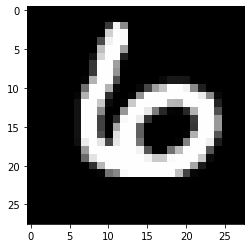

In [ ]:
import matplotlib.pyplot as plt

# Show one example from the training and it's label
print("label for this example in training dataset is:", labels[0].item())
plt.imshow(images[1,:].squeeze(), cmap="gray")

### Building the Network

We will use a convolutional network for classification. The following architecture is adapted from the famous [LeNet-5](https://ieeexplore.ieee.org/document/726791) [1].

[1] LeCun, Yann, et al. "Gradient-based learning applied to document recognition." Proceedings of the IEEE 86.11 (1998): 2278-2324.

In [ ]:
class MyNet(nn.Module):
    def __init__(self):
        super(MyNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, padding=2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        self.fc1 = nn.Linear(in_features=16 * 5 * 5, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=84)
        self.fc3 = nn.Linear(in_features=84, out_features=10)

    def forward(self, x):
        out = F.relu(self.conv1(x))
        out = F.max_pool2d(out, 2)
        out = F.relu(self.conv2(out))
        out = F.max_pool2d(out, 2)
        out = out.reshape(out.size(0), -1)
        out = F.relu(self.fc1(out))
        out = F.relu(self.fc2(out))
        out = self.fc3(out)
        return out

In [ ]:
# Define the model and move it to GPU
net1 = MyNet().to(cuda0)

In [ ]:
# This network output a size 10 vector for each input image, as verified below 
# using a random input tensor.

random_input = torch.randn(123, 1, 28, 28, device=cuda0)
output = net(random_input)
print(output.shape)

torch.Size([123, 10])


### Training Loop


For classification, we will use the cross-entropy loss [`F.cross_entropy`](https://pytorch.org/docs/stable/nn.html#torch.nn.functional.cross_entropy) to train this network.

We can write a function that iterates through the training set (via `train_loader`) and train for 1 epoch. The code is extremely similar to what we did for approximating $f(x) = \cos(x)$, only with new ways to load data and compute loss.

In [ ]:
def train(net, optim):
    net.train()
    for image_cpu, label_cpu in train_loader:
        # put data onto GPU
        image = image_cpu.to(cuda0)
        label = label_cpu.to(cuda0)
        
        # clear gradient
        optim.zero_grad()
        
        # forward through the network
        output = net(image)
        
        # compute loss and gradient
        loss = F.cross_entropy(output, label)
        loss.backward()
        
        # update parameters
        optim.step()

Let's also write a function that evaluates our network on the validation set.

In [ ]:
def evaluate(net):
    total = 0
    correct = 0
    
    net.eval()  # puts the network in eval mode. this is important when the 
                # network has layers that behaves differently in training and 
                # evaluation time, e.g., dropout and batch norm.
    for image_cpu, label_cpu in val_loader:
        # put data onto GPU
        image = image_cpu.to(cuda0)
        label = label_cpu.to(cuda0)
        
        with torch.no_grad():  # gradients are not tracked in this context manager
                               # since we are evaluating, gradients are not needed 
                               # and we can save some time and GPU memory.
              
            # forward through the network, and get the predicted class
            prediction = net(image).argmax(dim=-1)  
            
            total += image.size(0)  # batch size
            correct += (prediction == label).sum().item()  # `.item()` retreives a python number from a 1-element tensor
            
    return correct / total

In [ ]:
# Without any training, the network accuracy matches that of random guessing: ~10%.

print('At initialization, the network has accuracy {:.4f}%'.format(evaluate(net) * 100))

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


At initialization, the network has accuracy 10.7200%


### Putting Everything Together

In [ ]:
num_epochs = 10
lr = 0.1

def train_loop(net, num_epochs, lr):

  optim = torch.optim.SGD(net.parameters(), lr=lr)

  for epoch in range(num_epochs):
      val_acc = evaluate(net) * 100
      print('Epoch: {}\tValidation Accuracy: {:.4f}%'.format(epoch, val_acc)
      train(net, optim)
      
  print('Done! \tValidation Accuracy: {:.4f}%'.format(evaluate(net) * 100))


train_loop(net1, 10, 0.1)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: 0	Validation Accuracy: 9.8000%
Epoch: 1	Validation Accuracy: 80.5400%
Epoch: 2	Validation Accuracy: 89.7300%
Epoch: 3	Validation Accuracy: 94.5000%
Epoch: 4	Validation Accuracy: 96.0900%
Epoch: 5	Validation Accuracy: 95.4600%
Epoch: 6	Validation Accuracy: 97.2100%
Epoch: 7	Validation Accuracy: 94.4600%
Epoch: 8	Validation Accuracy: 96.2800%
Epoch: 9	Validation Accuracy: 96.8800%
Done! 	Validation Accuracy: 97.6000%


In [ ]:
import PIL

# Utility function
def tensor2image(tensor):
    return PIL.Image.fromarray((tensor.detach() * 127.5 + 128).clamp_(0, 255).to('cpu', torch.uint8).numpy()[0])

In [ ]:
# Get a data sample we want to attack

data, label = mnist_val[30]
data = data.to(cuda0)

In [ ]:
# Look at the image

tensor2image(data)

In [ ]:
# Label is...

print('label is', label)

label is 3


In [ ]:
# Let's see what our trained network says about this image.


# turn the network into eval mode
net.eval()
output = net(data.unsqueeze(0))  # .unsqueeze(0) insert a batch dimension so it looks like batched data
prediction = output.argmax(-1)
print('predicted class is', prediction.item())

predicted class is 3


check more samples:

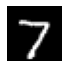

predicted class is 7


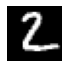

predicted class is 2


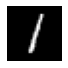

predicted class is 1


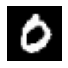

predicted class is 0


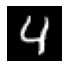

predicted class is 4


In [ ]:
import matplotlib.pyplot as plt
for i in range(5):
    # Get a data sample we want to attack

    data, label = mnist_val[i]
    data = data.to(cuda0)
    # Look at the image

    plt.figure(figsize=(1,1))
    plt.imshow(tensor2image(data), cmap='gray')
    plt.axis('off')
    plt.show()
    
    # turn the network into eval mode
    net.eval()
    output = net(data.unsqueeze(0))  # .unsqueeze(0) insert a batch dimension so it looks like batched data
    prediction = output.argmax(-1)
    print('predicted class is', prediction.item())

# Exercise 3

Based the archetrure of MyNet, can you add another convolutional layer $conv3$?
When making the changes to the convolutional layers, you also need to adjust the fully connected layers (fc). Complete the MyNet2 below, and train the dataset with this new model. Compare the results with the previous model. Plot the validtion accuracy for each epoch for each model. 

In [ ]:
## Use this as a start
class MyNet2(nn.Module):
    def __init__(self):
        super(MyNet2, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        self.conv3 = ##### Your code
        self.fc1 = #### Your code
        self.fc2 = nn.Linear(in_features=120, out_features=84)
        self.fc3 = nn.Linear(in_features=84, out_features=10)

    def forward(self, x):
        out = F.relu(self.conv1(x))
        out = F.relu(self.conv2(out))
        out = F.max_pool2d(out, 2)
        out = F.relu(self.conv3(out))
        out = F.max_pool2d(out, 2)
        out = out.reshape(out.size(0), -1)
        out = F.relu(self.fc1(out))
        out = F.relu(self.fc2(out))
        out = self.fc3(out)
        return out

# Exercise 4

We worked through an example using grayscale images, and now let us try to train an image classification model on color images from CIFAR-10 dataset.

In [ ]:
# Import dataset and dataloaders related packages
import random
import numpy as np
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
from torchvision.transforms import Compose, Grayscale

import torch
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt


Download and load the images from the CIFAR10 dataset

In [ ]:
## Set seed for reproducibility in dataloader
def seed_worker(worker_id):
  worker_seed = torch.initial_seed() % 2**32
  np.random.seed(worker_seed)
  random.seed(worker_seed)

g_seed = torch.Generator()
my_seed = 2021
g_seed.manual_seed(my_seed)


In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          worker_init_fn=seed_worker, num_workers=2,
                                          generator=g_seed)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                        worker_init_fn=seed_worker, num_workers=2,
                                        generator=g_seed)

Files already downloaded and verified
Files already downloaded and verified


We have 50000 samples loaded. Now let's take a look at one of them in detail. Each sample consists of an image and its corresponding label. 

These color images are 3D tensors. The first dimension corresponds to the channels (C) of the image (in this case we have RGB images). The second dimensions is the height (H) of the image and the third is the width (W). We can denote this image format as C × H × W.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: deer
Image size: torch.Size([3, 32, 32])


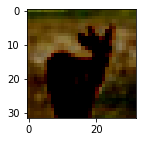

In [ ]:
# Choose a random sample
random.seed(121)
image, label = trainset[random.randint(0, len(trainset))]
print(f"Label: {trainset.classes[label]}")
print(f"Image size: {image.shape}")

# Show the image
plt.figure(figsize = (2,2))
plt.imshow(image.permute(1,2,0))

Show one example from the batch in training

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Batch size: torch.Size([4, 3, 32, 32])


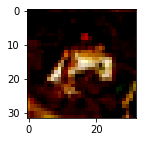

In [ ]:
# Load the one batch
batch_images, batch_labels = next(iter(trainloader))
print('Batch size:', batch_images.shape)

# Display the first image from the batch
plt.figure(figsize = (2,2))
plt.imshow(batch_images[0].permute(1,2,0))

**TODO**:

Now, can you create a simple Convolutional Neural Network for image classification? This network may have the similar archetecture as MyNet. Train the model for 10 epoch, and plot the validation accuracy. Visualize the result using a confusion matrix and heatmap. Show which class of image has highest prediction accuracy? What about the class with lowest prediction accuracy? 